<div style="padding: 5px; padding-left: 10px;">
    
<center><h2>Table of Contents & Jumplinks</h2></center>

<h3><a href='#introduction'>Introduction</a></h3>
<h4><a href='#matplotlib'>Matplotlib background</a></h4>
<h4><a href='#seaborn'>Seaborn background</a></h4>
    
<h3>Effective Visualizations & Accessibility</h3>
<h4><a href='#vizfoundation'>proper foundation</a></h4>   
<h4><a href='#accessibility'>ensuring accessibility</a></h4>
<h4><a href='#choosing'>choosing the right visualization</a></h4> 

<h3>Exploratory and Basic Data Visualizations</h3>
<h4><a href='#bar'>Bar plots</a></h4>
<h4><a href='#box'>Box plots</a></h4>
<h4><a href='#violin'>Violin plots</a></h4>
<h4><a href='#scatter'>Scatter plots</a></h4>
<h4><a href='#distribution'>Distribution plots</a></h4>
<h4><a href='#timeseries'>Line/timeseries plots</a></h4>
<h4><a href='#images'>image data</a></h4>    
<h4><a href='#multiplot'>multiple plots per figure</a></h4>

<h3> Multivariate and More Advanced Data Visualizations</h3>
<h4><a href='#multivariate'>multivariate plots</a></h4>
<h4><a href='#tablelens'>table lensing</a></h4>  
<h4><a href='#correlation_heat'>Heatmaps & Correlation Heatmaps</a></h4>
<h4><a href='#pca'>Principle Components Analysis</a></h4>


 
   

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Introduction to Matplotlib</h1></center>

<p>
    <b>matplotlib</b> is a plotting library for Python.
<p>
<h3>Pros:</h3>
<ul> 
<li>Huge amount of functionality/options.
<li>Works with numpy arrays and python lists.
<li>Comes with many prepackaged Python distros (anaconda, WinPython, etc.).
<li>Easily saves plots to image (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats.
<li>Has an excellent set of examples (with code) at the <a href="http://matplotlib.org/gallery">matplotlib gallery</a>
<li>Shares many syntactic conventions with Matlab.
</ul>

<p>
<h3>Cons:</h3>
<ul>
<li>Slow for rapidly updating plots.
<li>3D plotting support is not great.
<li>Documentation is not always useful.
<li>Essentially has two interfaces.  One is intended to be close to Matlab, the other is object oriented.  You will find examples that assume one or the other, but rarely the one you are after.
<li>Shares many syntactic conventions with Matlab.
</ul>
</div>

Start with a strong foundation.
The following is true for any data visualization, but is especially important when you’re focused on accessibility. A concise and coherent concept ensures users of all abilities can engage with your visualization. Put the numbers aside for a moment and ask yourself these questions:

What story does the data tell? This helps you decide which aspect(s) to focus on. Imagine a chart that shows the populations of 10 major cities. If your goal is to compare San Francisco and New York, let that story shine through. This means Chicago’s population isn’t as relevant, and you might choose to minimize it. Likewise, if you have a particularly complex data set, you can break it into smaller and simpler chunks.
How should the reader benefit from the visualization? Consider how your graph will help the user understand insights from the data. Like in the previous example, layer in context to pull those learnings to the surface.
Can you understand it in 5 seconds? If the visual adds more complexity than your written word would otherwise, think about whether you need it in the first place.

**Title:** Give the visualization a descriptive “takeaway” title that illustrates the major insight.
* Fine: “My ice cream consumption compared to the national average”
* Great: “A graph titled: My yearly ice cream consumption has bested the national average since 2010. From the years 2000 to 2010, the yearly ice cream consumption levels of myself and the average American are similar. Around 2010, my consumption level spikes much higher and remains that way to the present day. The summary of the data is as follows…”

**Summary:** In text, summarize in real, human words the story the information seeks to convey. This text can be discoverable only by assistive technology. If it’s also visible on screen without those tools, even better.
Ask yourself: How would you describe the graph and its insights to a friend? Better yet, ask a friend to analyze it and summarize what they find.
**Axis labels (when applicable):** Label each axis and their tick marks. This should be visible to the user and accessible through assistive technology.
**Data labels:** Label each data point directly—use a connecting line, if you need to—rather than using a separate color-coded key. Users who cannot discern certain colors will still be able to interpret the data.
Take the following into account during implementation:

Alt text: Ensure your visual has descriptive alt text.
Bad: “ice_cream_consumption_chart”
Great: “Graph showing my yearly ice cream consumption is much larger than the national average”



**Resources**
https://colorbrewer2.org/

In [58]:
import os
import numpy as np
import pandas as pd

# main plotting packages
import seaborn as sns
import matplotlib.pyplot as plt


# PCA specific packages
from pca import pca as PCA

from sklearn.decomposition import PCA as SK_PCA
from sklearn.preprocessing import StandardScaler



In [2]:
# load the data
csv_path = os.path.join('example_datasets', "cars_dataset.csv",)
cars = pd.read_csv(csv_path)

# view the data
cars

,Make,Model,Origin,Year,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,Chevrolet,Chevelle Malibu,US,70,18.0,8,307.0,130,3504,12.0
1,Buick,Skylark 320,US,70,15.0,8,350.0,165,3693,11.5
2,Plymouth,Satellite,US,70,18.0,8,318.0,150,3436,11.0
3,AMC,Rebel SST,US,70,16.0,8,304.0,150,3433,12.0
4,Ford,Torino,US,70,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...,...,...,...,...
401,Ford,Mustang GL,US,82,27.0,4,140.0,86,2790,15.6
402,Volkswagen,Pickup,Europe,82,44.0,4,97.0,52,2130,24.6
403,Dodge,Rampage,US,82,32.0,4,135.0,84,2295,11.6
404,Ford,Ranger,US,82,28.0,4,120.0,79,2625,18.6


<a id='matplotlib_basics'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> Matplotlib Basics </h2>

**Description**:
Because Seaborn is essentially a wrapper for matplotlib there are many matplotlib conventions and functions that we will use on almost all of our plots.  


**Code Basics**
    
* create a figure: <code>fig, axe = plt.subplots()</code>
    * Adjust figure size: <code>fig, axe = plt.subplots(figsize = (horizontal, vertical)</code>
    * Multiple plots per figure: <code>fig, axe = plt.subplots(n_rows, n_columns)</code>
        * Note!: we will cover this more in-depth later!

* add title: <code>axe.set_title('plot title')</code>
* set x label: <code>axe.set_xlabel('x label')</code>
* set y label: <code>axe.set_ylabel('y label')</code>

Text(0, 0.5, 'y axis')

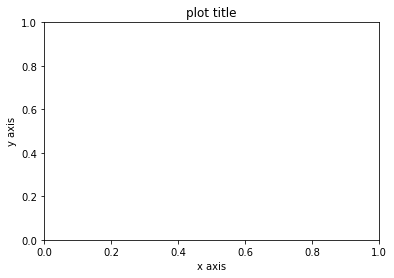

In [57]:
# Lets practice by creating a blank plot! 

fig, axe = plt.subplots()
axe.set_title('plot title')
axe.set_xlabel('x axis')
axe.set_ylabel('y axis')

<a id='barplots'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> Barplots </h2>
    

**Description:** A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.
    
Horizontal barplots are slightly more easy for the human eye to interpret. 

**Tips for creating an effective visualization**
<img src="example_images/data_visualization_tutorial/viz_generic_barplot.png" height="350"/> 
* If your data is categorical, order it smallest to largest for vice versa
* Horizontal plots are slightly easier for humans to interpret

**Jumplinks:**
* <a href='#barplot_pandas'> with pandas</a>
* <a href='#barplot_seaborn'>with seaborn</a>

    
note: Matplotlib.pyplot also offers barplot that we don't cover here. For more information see the documentation here: vertical barplots: [.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html),
horizontal barplots: [.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)


<a id='barplot_pandas'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**Bar Plots: Pandas**

Using pandas built-in <code>.groupby()</code> and <code>.agg()</code> functions can make barplots much easier.
 
vertical barplots: [.bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

horizontal barplots [.barh](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html)

Text(0, 0.5, 'Counts')

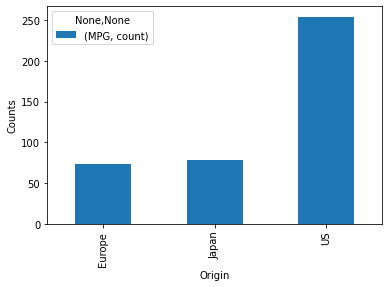

In [61]:
# lets begin by plotting how many cars there are for each origin
ax = cars[['Origin', 'MPG']].groupby('Origin').agg(['count']).plot.bar()

# make sure we add labels! 
ax.set_xlabel("Origin")
ax.set_ylabel("Counts")

Text(17.200000000000003, 0.5, 'Counts')

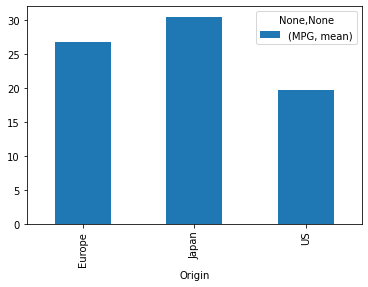

In [4]:
# we can continue by plotting two variables, this time lets plot
# the average MPG by Origin

cars[['Origin', 'MPG']].groupby('Origin').agg(['mean']).plot.bar()
ax.set_xlabel("Origin")
ax.set_ylabel("Counts")

<a id='barplot_seaborn'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Bar Plots: Seaborn</h3>

Seaborn has two options for barplots:

**[.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html):**
plots the frequency of categorical variables

* Basic countplot: <code>sns.countplot(x = 'column', data = df)</code>


**[.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot):**
Represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Seaborn handles aggregation automatically, and uses mean as the default aggregator.
* the <code>estimator</code> argument can be changed to different measurements of central tendancy such as median
* Basic barplot: <code>sns.barplot(x = 'column', y= 'column", data = df)</code>
    
**Helpful Parameters:**
* <code>x, y</code>: Axis to plot on, x is a vertical plot, y is a horizontal plot
* <code>order</code>: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
* <code>color</code>: Color for all of the elements, or seed for a gradient palette.

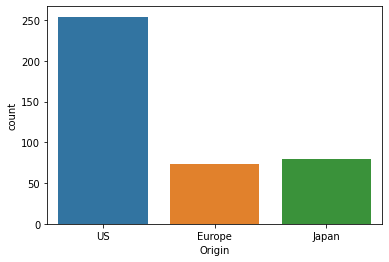

In [5]:
sns.countplot(x='Origin', data = cars)

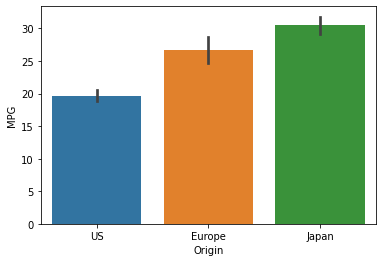

In [6]:
sns.barplot(x='Origin', y='MPG', data = cars)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**STUDENT EXERCISES:** 
Lets combine some pandas filtering and some plot aesthetics to create a barplot that looks like the "best" example. 
    
    
* filter the cars dataframe to just Japanese origin
* set up the axis so it plots horizontally
* make a countplot of "Make"
* Order the data by Make counts (hint, you can use <code>.value_counts().index</code>)

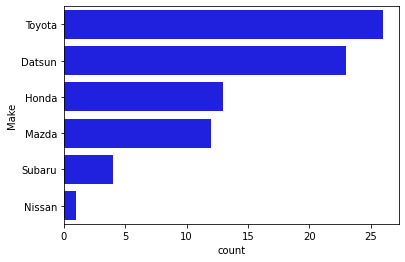

In [42]:
# SOLUTION

japan_cars = cars.loc[cars["Origin"]=="Japan"]

sns.countplot(y='Make', 
              color='b',
              order = japan_cars['Make'].value_counts().index,
              data = japan_cars)

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> Boxplots </h2>
    
**Description**:
In descriptive statistics, a boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also termed as the box-and-whisker plot. Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot.
    
<img src="example_images/data_visualization_tutorial/viz_boxplot_distribution.png" width="400"/> 

Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.    
    
**Tips for creating an effective visualization**
<img src="example_images/data_visualization_tutorial/viz_generic_boxplots.png" height="350"/> 
* If your data is categorical, order it smallest to largest for vice versa
* Horizontal plots are slightly easier for humans to interpret

**Jumplinks:**
* <a href='#boxplot_matplotlib'> with matplotlib</a>
* <a href='#boxplot_seaborn'>with seaborn</a>

<a id='boxplot_matplotlib'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Box Plots: Matplotlib.pyplot</h3>

[.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) will create a basic boxplot that you will have to add titles and axes labels to.

**Basic code:**
* vertical: <code>plt.boxplot(df["column"])</code>
* horizontal: <code>plt.boxplot(df["column"], vert=False )</code>

Text(0.5, 0, 'Horsepower')

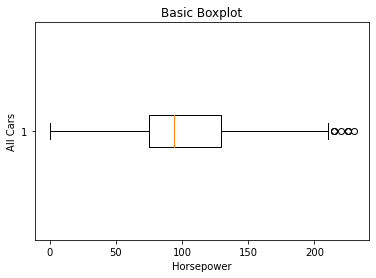

In [7]:
# Lets plot the distribution of horsepower from all cars 
# using a boxplot! 

fig, ax = plt.subplots()
ax.boxplot(cars['Horsepower'], vert=False)
ax.set_title('Basic Boxplot')
ax.set_ylabel('All Cars')
ax.set_xlabel('Horsepower')

<a id='boxplot_seaborn'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Box Plots: Seaborn</h3>

[.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) will create a basic boxplot that will automatically use to column name as the label.

**Basic code:**
* single variable: <code>sns.boxplot(x = "column", data = df)</code>
* 2 variables:<code>sns.boxplot(x = "values_column", y = "category_column", data = df)</code>

**Helpful Parameters:**
* <code>x, y</code>: Axis to plot on, x is a horizonta plot, y is a vertical plot
* <code>hue</code>: Further grouping/sub categories to plot
* <code>order</code>: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

Text(0.5, 1.0, 'All Cars')

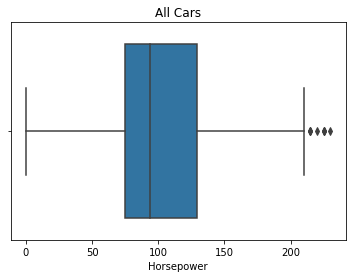

In [59]:
# Lets recreate the basic boxplot of horsepower with seaborn
fig, ax = plt.subplots()
ax = sns.boxplot(x = "Horsepower",
                 data = cars)
ax.set_title("All Cars")

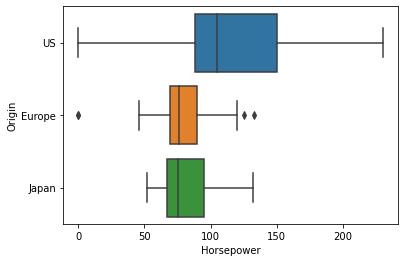

In [9]:
# now lets add Origin as a categorical variable
fig, ax = plt.subplots()
ax = sns.boxplot(x = "Horsepower",
                 y = "Origin",
                 data = cars)


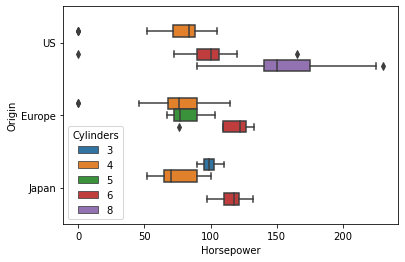

In [10]:
# we can add even more by dilenating by number of cylinders
fig, ax = plt.subplots()
ax = sns.boxplot(x = "Horsepower",
                 y = "Origin",
                 hue = "Cylinders",
                 data = cars)

<a id='violin'></a>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**STUDENT EXERCISES:** 
Build on the momentum from the last exercise to recreate the "best" plot example. 
    
    
* Use the filtered dataframe from the last exercise (Filtered to Japan as the Origin)
* set up the axis so it plots horizontally
* Boxplots of "MPG" by "Make"
* Order the data median MPG per make
    * Hint: Use the same methodolgy to aggregate & sort values from the Pandas tutorial, using <code>.groupby()</code>, <code>.agg()</code> and <code>.sort_values()</code>, then use the <code>.index</code> from that sorted df as the order in the boxplot
    

In [43]:
# SOLUTION:

# sorting the values
df_agg = japan_cars[['Make','MPG']].groupby('Make').agg(['median'])
df_agg.sort_values(by=[('MPG', 'median')], ascending = False, inplace=True)

# making the plot
fig, ax = plt.subplots()
ax = sns.boxplot(x = "MPG",
                 y = "Make",
                 order = df_agg.index,
                 data = japan_cars)
ax.set_xlabel('values')
ax.set_ylabel('categories')

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">

<h2> Violin Plots </h2>
    
**Description:** A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude.
    
<img src="example_images/data_visualization_tutorial/viz_violinplot.png" width="400"/>

**Jumplinks:**
* <a href='#violin_seaborn'>with seaborn</a>

<a id='violin_seaborn'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Violin Plots: Seaborn</h3>

**Description:**[.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) will create a basic violin that will automatically use to column name as the label. It uses all the same parameters as boxplot. 

**Basic code**
* single variable: <code>sns.violinplot(x = "column", data = df)</code>
* 2 variables:<code>sns.violinplot(x = "values_column", y = "category_column", data = df)</code>

**Helpful Parameters:**
* <code>x, y</code>: Axis to plot on, x is a horizonta plot, y is a vertical plot
* <code>hue</code>: Further grouping/sub categories to plot
* <code>order</code>: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

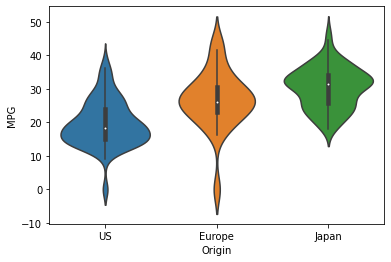

In [11]:
### Create a basic violin plot showing the distribution of miles per gallon by origin
sns.violinplot(x = 'Origin', 
               y = 'MPG',
               data = cars)

<a id='scatter'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> Scatter Plots </h2>
    
**Description:** Scatter plots use dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.
    
<img src="example_images/data_visualization_tutorial/viz_scatter_plot.png" width="500"/> 

**Jumplinks:**
* <a href='#scatter_matplotlib'>with matplotlib</a>  
* <a href='#scatter_seaborn'>with seaborn</a>

<a id='scatter_matplotlib'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**Scatter Plots: Matplotlib.pyplot**

[.scatter]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)   

Text(0, 0.5, 'Weight')

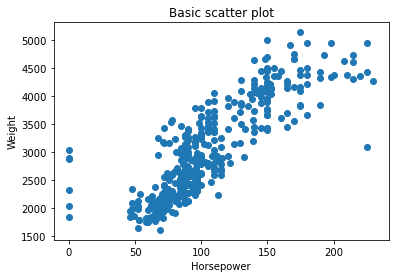

In [88]:
# Lets create a basic scatter plot of MPG by Horsepower

fig, ax = plt.subplots()

ax.scatter(x = cars['Horsepower'],
           y = cars['Weight'])

ax.set_title('Basic scatter plot')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')

<a id='scatter_seaborn'></a>

Text(0, 0.5, 'Weight')

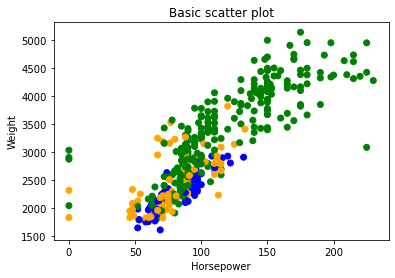

In [89]:
# We can also add categorical colors by using a dictionary

origin_colors = {'US':'green', 'Europe':'orange', 'Japan':'blue'}

fig, ax = plt.subplots()

ax.scatter(x = cars['Horsepower'],
           y = cars['Weight'],
           c = cars['Origin'].map(origin_colors))

ax.set_title('Basic scatter plot')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Scatter Plots: Seaborn</h3>

**Description:**[.scatter]( https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) will create a basic violin that will automatically use to column name as the label. It uses all the same parameters as boxplot. 

**Basic code**
* single variable: <code>sns.violinplot(x = "column", data = df)</code>
* 2 variables:<code>sns.violinplot(x = "values_column", y = "category_column", data = df)</code>

**Helpful Parameters:**
* <code>hue</code>: Further grouping/sub categories to plot
* <code>size</code>: Grouping variable that will produce points with different sizes. 
* <code>style</code>: Grouping variable that will produce points with different markers.

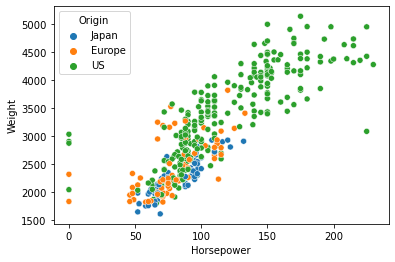

In [90]:
# Scatter plots work well with row level data
sns.scatterplot(data = cars,
                x = 'Horsepower', 
                y = 'Weight',
                hue = 'Origin'
               )

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**STUDENT EXERCISES:** 
 
Recreate the following plot:  
<img src="example_images/data_visualization_tutorial/viz_student_exercise_mulivariate.png" width="500"/> 
    
Hint: using seaborn is easier than matplotlib
    
**Answer the following questions:** 
* How many variables are encoded?
* Is the encoding effective?
* Are there ways that it could be improved?

In [ ]:
# Solution

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(data=cars,
                x="Horsepower", y="MPG", 
                hue="Origin", size="Weight",
                alpha=.5, palette="muted",
                sizes=(40, 400))

<a id='distribution'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> Distribution Plots</h2>

    
**Histograms**

A histogram is a classic visualization tool that represents the distribution. There are two basic types of histograms: frequency and density.  
    
Frequency histograms display one or more variables by counting the number of observations that fall within disrete bins.
    
Density histograms give rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1.
    
<img src="example_images/data_visualization_tutorial/viz_histogram_generic.png" width="500"/> 

    
**Kernel Density Estimates**

A [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
 
Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.
 
<img src="example_images/data_visualization_tutorial/viz_hist_vs_KDE.png" width="500"/> 
    

Jumplinks:
* <a href='#histo_matplotlib'>with matplotlib</a>  
* <a href='#histo_seaborn'>with seaborn</a>

<a id='histo_matplotlib'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Histograms: Matplotlib</h3>
    
histograms are relatively simple with matplotlib using **[.hist]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)**
    
**frequency:** 
    <code>plt.hist(df['column'], bins = int)</code>

**density:**
    <code>plt.hist(df['column'], bins = int, density = True)</code>

Text(0, 0.5, 'Frequency')

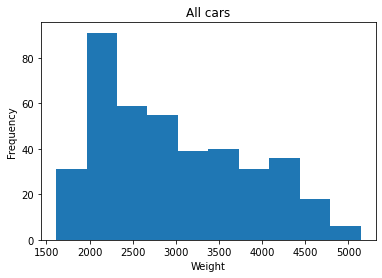

In [15]:
# Plot a histogram of counts of cars by Weight with 10 bins
fig, ax = plt.subplots()

ax.hist(cars['Weight'], 
        bins=10)

ax.set_title('All cars')
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Density')

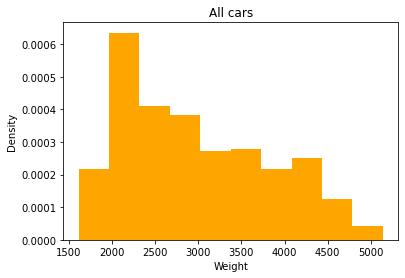

In [16]:
# Showing density instead of frequency
fig, ax = plt.subplots()

ax.hist(cars['Weight'],
        color = 'orange',
        bins=10, 
        density=True)

ax.set_title('All cars')
ax.set_xlabel('Weight')
ax.set_ylabel('Density')

<a id='histo_seaborn'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Histograms: Seaborn</h3>

Seaborn has several ways of creating histogram-like visualizations.

**[.histplot]( https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot):** the most straightforward histogram plot function
* basic: <code>sns.histplot(data=df, x="column")</code>
* density: <code>sns.histplot(data=df, x="column", stat="density")</code> 
* basic with kde: sns.histplot(data=df, x="column", kde=True)
    
**[.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot):** specializes in kernel density estimate plots
* basic: <code>sns.kdeplot(data=df, x="column")</code>
* multiple categories: <code>sns.kdeplot(data=df, x="column", hue="size")</code>

**[.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot):** the most flexible of the distribution plot functions
* basic: <code>sns.displot(data=df, x="column", kind="hist")</code>
* multiple categories: 
    <code>sns.displot(data=df, x="column", hue = "category_column", kind="hist")</code>
* the <code>kind</code> argument can be set to "hist", "kde" or "ecdf"

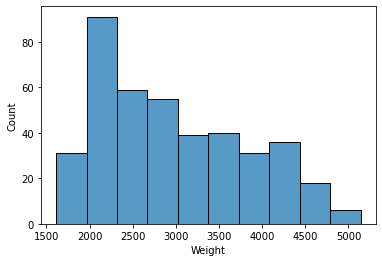

In [17]:
# lets create a basic histogram of car weights
sns.histplot(data = cars, 
             x = "Weight")

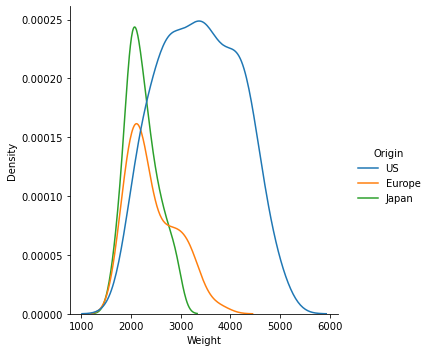

In [18]:
# now lets create a kde plot of weights categorized by origin
sns.displot(data = cars, 
             x = "Weight", 
             hue = "Origin", 
             kind = "kde")

<a id='timeseries'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
 
<h3> Timeseries / Line Plots</h3>

**Description:** A time series or line plot, is a data visualization tool that illustrates data points at successive intervals of time. Each point on the chart corresponds to both a time and a quantity that is being measured.
   
<img src="example_images/data_visualization_tutorial/viz_timeseries_examples.png" height="350"/>
    
    
**Tips for creating an effective visualization**
    
The relationship between x and y can be shown for different subsets of the data using 
* line color
* line size/ weight
* line style

These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both color and style for the same variable) can be helpful for making graphics more accessible.

<img src="example_images/data_visualization_tutorial/viz_timeseries_improvements.png" width="650"/>


**Jumplinks:**
* <a href='#timeseries_matplotlib'>line plots with matplotlib</a>
* <a href='#timeseries_seaborn'>line plots with seaborn</a>  

<a id='timeseries_matplotlib'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**Lineplots: matplotlib**
    
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

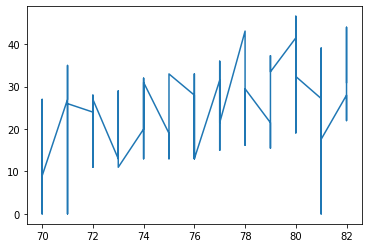

In [19]:
# Lets try plotting  "MPG" by "Year"
# What is going on with the plot? 
plt.plot(cars["Year"],
         cars["MPG"])

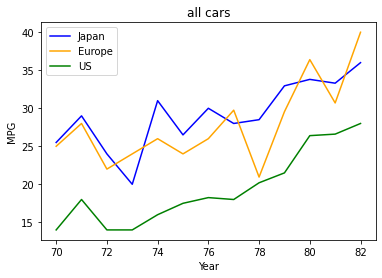

In [81]:
# To handle the data a little better we will group by Origin and compute 
# the median MPG per each Origin group
japan_mpg_med = cars.loc[cars["Origin"]=="Japan", ['Year', 'MPG']].groupby('Year').agg(['median']) 
euro_mpg_med = cars.loc[cars["Origin"]=="Europe", ['Year', 'MPG']].groupby('Year').agg(['median']) 
us_mpg_med = cars.loc[cars["Origin"]=="US", ['Year', 'MPG']].groupby('Year').agg(['median'])


# Create the figure
fig, ax = plt.subplots()

ax.plot(japan_mpg_med, label = "Japan", c = 'blue') # set a label and color
ax.plot(euro_mpg_med, label = "Europe", c = 'orange')
ax.plot(us_mpg_med, label = "US", c = 'green')

# title & Label axes
ax.set_title('all cars')
ax.set_xlabel('Year')
ax.set_ylabel('MPG')

# add legend
ax.legend()

<a id='timeseries_seaborn'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Lineplots: Seaborn</h3>

**Description:**[.lineplot]( https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) offers a line plot with possibility of several semantic groupings. It will automatically handle aggregation, and has built in functionality for drawing multiple lines based on category. 

**Basic code**
* single variable: <code>sns.lineplot(data=df, x="column", y="column")</code>
* 2 variables:<code>sns.violinplot(x = "values_column", y = "category_column", data = df)</code>

**Helpful Parameters:**
* <code>hue</code>: Grouping variable that will produce lines with different colors
* <code>size</code>: Grouping variable that will produce lines with different widths. 
* <code>style</code>: Grouping variable that will produce lines with different dashes and/or markers.
* <code>legend</code>:How to draw the legend. 
    * “auto”: choose between brief or full representation based on number of levels.
    * “brief”: numeric hue and size variables will be represented with a sample of evenly spaced values.
    * “full": every group will get an entry in the legend.
    * False: no legend data is added and no legend is drawn.

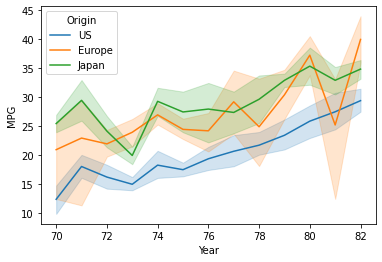

In [20]:
# Lets make the same plot but with seaborn

sns.lineplot(data = cars,
             x="Year", 
             y="MPG",
             hue = "Origin",
            )

<a id='multiplot'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> Multi Plot Figures</h2>
 
**Figures with Subplots**

A given figure can have more than one axis. The subplot command, which we used above, generates a single axis by default. But we can specify the number of axes that we want..
    
<img src="example_images/data_visualization_tutorial/viz_subplots.png" width="500"/> 

    
**Complex Figures with Gridspec**

[Gridspec](http://matplotlib.org/users/gridspec.html) is useful when you have uneven subplots. It can get tricky for more complex plots, so first try to use <code>ax.subplots()</code> (like in the previous examples) if possible.  
 
<img src="example_images/data_visualization_tutorial/viz_gridspec.png" width="500"/> 
    

Jumplinks:
* <a href='#subplots_matplotlib'>subplots with matplotlib</a>
* <a href='#gridspec_matplotlib'>gridspec with matplotlib</a>  

<a id='subplots_matplotlib'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**Subplots: matplotlib**

[.subplots]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html): creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

General code example: 

<code>fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot()
axes[1].plot()</code>
    
Optional Parameters for subplots call:
* <code> sharex/sharey = bool </code> forces plots to display the same range along the x-axis  or y-axis depending upon which argument you call. Default = False

Text(0.5, 0, 'All Cars')

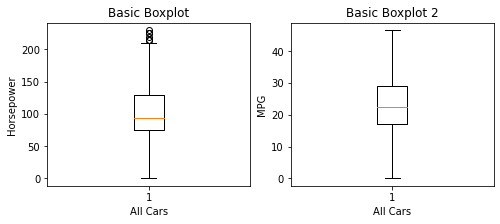

In [21]:
# Lets create 2 basic boxplots of Horsepower and MPG and put them
# in the same figure: 

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,3))

axes[0].boxplot(cars['Horsepower'])
axes[0].set_title('Basic Boxplot')
axes[0].set_ylabel('Horsepower')
axes[0].set_xlabel('All Cars')


axes[1].boxplot(cars['MPG'])
axes[1].set_title('Basic Boxplot 2')
axes[1].set_ylabel('MPG')
axes[1].set_xlabel('All Cars')

Text(0.5, 1.0, 'MPG distribution')

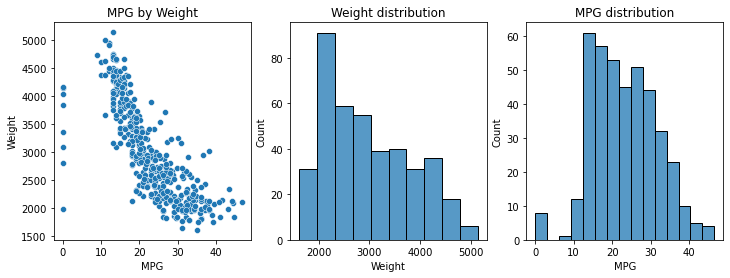

In [22]:
# Because Seaborn is built on Matplotlib we can also put multiple
# seaborn plots in the same figure.
# We just need to add the ax = axes[int] parameter

# Lets make a scatter plot of MPG by weight and then the distributions
# for MPG and Weight

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.scatterplot(x = "MPG",
                y = 'Weight',
                data = cars,
                ax = axes[0])
axes[0].set_title("MPG by Weight")


sns.histplot(x = "Weight", 
             data = cars,
             ax = axes[1])
axes[1].set_title("Weight distribution")

sns.histplot(x = "MPG", 
             data = cars,
             ax = axes[2])
axes[2].set_title("MPG distribution")

<a id='gridspec_matplotlib'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**gridspec: matplotlib**

[.subplots]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html): creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

General code example: 

<code>
fig = plt.figure()
gridspec_fig = fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width
    
ax0.plot()
ax1.plot()
ax2.plot()
</code>
    
Optional Parameters for subplots call:
* <code> sharex/sharey = bool </code> forces plots to display the same range along the x-axis  or y-axis depending upon which parameter you call. Default = False

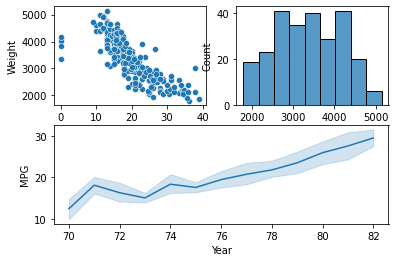

In [23]:
# Because Seaborn is built on Matplotlib we can also put multiple
# seaborn plots in the same figure.
# We just need to add the ax = axes[int] parameter

# Lets make a scatter plot of MPG by weight and then the distributions
# for MPG and Weight

us_cars = cars.loc[cars["Origin"]=="US"]

fig = plt.figure()
gs= fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width

sns.scatterplot(x = "MPG",
                y = 'Weight',
                data = us_cars,
                ax = ax0)
axes[0].set_title("MPG by Weight")


sns.histplot(x = "Weight", 
             data = us_cars,
             ax = ax1)
axes[1].set_title("Weight distribution")


sns.lineplot(x="Year", 
             y="MPG",
             data = us_cars,
             ax = ax2)

<a id='multivariate'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

<h3>Table Lensing:</h3>

**Description:** Table Lens is a common information visualization method to dynamically explore large amounts of tabular data. Borrowing from the spreadsheet model, the Table Lens displays regional data values in columns and rows without scrollbars and without obscuring any data and filling the cells with scaled and coloured horizontal small bars.

<img src="example_images/data_visualization_tutorial/viz_table_lens.png" width="500"/> 

**visualization creation:**
* sort the dataframe/table values by a specific column
* Use horizontal barplots to plot the column of interest along with other columns
    * use the index from the sorted dataframe to create all plots.


<BarContainer object of 406 artists>

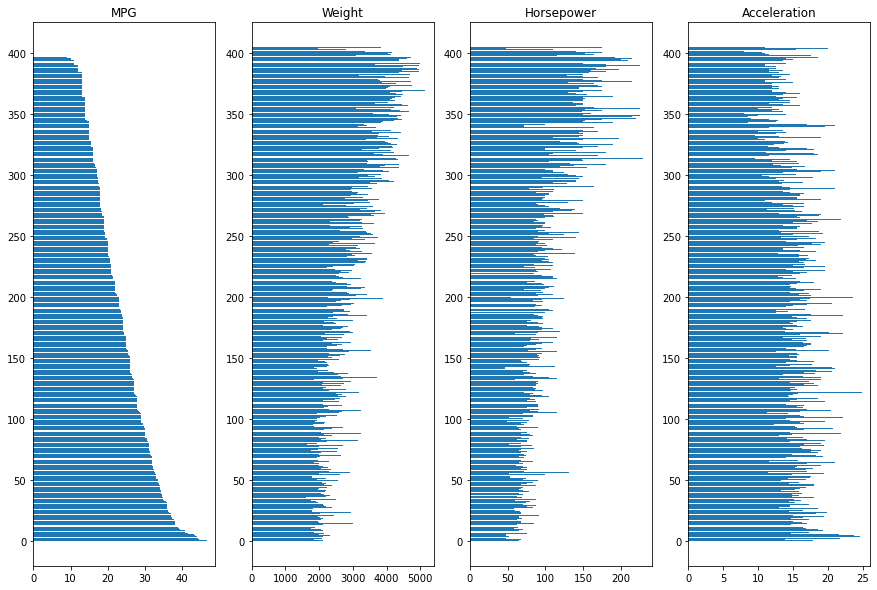

In [52]:
# Lets create a table lens using 'MPG' as our variable of interest

# Sort based on MPG and reset the index so it can be used in the other plots
cars.sort_values(by='MPG', ascending = False, inplace=True)
cars = cars.reset_index(drop=True)

# We will create a figure with 4 plots to accomodate the barplots
fig1, axs = plt.subplots(1,4, figsize=(15,10))

axs[0].set_title('MPG')
axs[0].barh(cars.index, cars['MPG'],tick_label=None)

axs[1].set_title('Weight')
axs[1].barh(cars.index, cars['Weight'],tick_label=None)

axs[2].set_title('Horsepower')
axs[2].barh(cars.index, cars['Horsepower'],tick_label=None)

axs[3].set_title('Acceleration')
axs[3].barh(cars.index, cars['Acceleration'],tick_label=None)

<a id='heatmaps'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2>Heatmaps & Correlation heatmaps</h2>

**Basic heatmap**
A heatmap is a type of matrix plot and graphical representation of data that uses a system of color-coding to represent different values. 
    
<img src="example_images/data_visualization_tutorial/viz_heatmap.png" width="300"/> 

    
**Correlation Heatmap**
A correlation heatmap specifically represents a correlation matrix, displaying the correlation between different variables. The value of correlation can take any value from -1 to 1. Correlation between two random variables or bivariate data does not necessarily imply a causal relationship. 
<img src="example_images/data_visualization_tutorial/viz_heatmap_correlation.png" width="500"/>    
To create the correlation matrix for the visualizations, we will be using the pandas function
 [.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)   
      

**Jumplinks:**
* <a href='#basic_heatmaps'>heatmaps with matplotlib and seaborn</a>
* <a href='#correlation_matrix'>correlation dataframe</a>    
* <a href='#correlation_heatmap'>correlation heatmaps with matplotlib and seaborn</a> 

<a id='basic_heatmaps'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">
<h3>Basic Heatmaps</h3>

**With Matplotlib:**

If you have a table of values, making a very basic heatmap is incredibly easy! 
* <code>plt.imshow(df)</code><img src="example_images/data_visualization_tutorial/viz_heatmap_matplotlib.png" width="200"/>


Perhaps creating plots like this is fine when you just want a very quick by eye assessment of the data. However, you might notice from the image above that it is not very interpretable and is missing some really important information such as labels, annotated values, and color scale bar etc.
The matplotlib code example provided in the cells below goes over how to add all the bells and whistles
   
    
**With Seaborn:**

Heatmaps with seaborn are much more straightforward than with matplotlib. and uses the [.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) function. 

There's several optional parameters that can be used to easily adjust the colormap and color bar and other aesthetics. Please see the documentation for more information. 
    
<code>sns.heatmap(data = df)</code>

NOTE: We will create a dataframe with synthetic data to work with for the basic heatmaps. This will use the techniques covered in the intro to pandas jupyter notebook

In [27]:
# first we will create a dataframe with fake data to use for our heatmap
uniform_data = np.random.rand(6, 6)
heatmap_df = pd.DataFrame(uniform_data, columns=['col_1', 'col_2', 'col_3',
                                                 'col_4', 'col_5', 'col_6'])

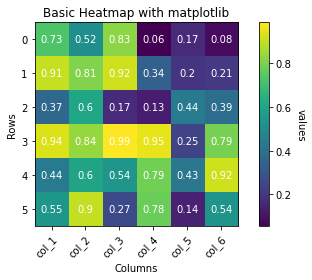

In [28]:
# basic heatmap with MATPLOTLIB:

# CREATE FIGURE
# for correlation matrices it's best to use a diverging colormap like "RdBu"
fig, ax = plt.subplots()
im = ax.imshow(heatmap_df)

# LABELING ROWS & COLUMNS

# set plot axes lables
ax.set_title("Basic Heatmap with matplotlib")
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')


# get individual row & column labels
column_labels = heatmap_df.columns
row_labels = heatmap_df.index

# show tickmarks for rows & columns
ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(row_labels)))

# attach labels to tickmarks
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# rotate labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
        
# ADD COLORBAR/SCALEBAR
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("values", rotation=-90, va="bottom")


## ADD ANNOTATED VALUES TO PLOT
# Loop over data dimensions
# get values from table and round them
# add  rounded values to text annotations on the plot
for row in range(len(row_labels)):
    for column in range(len(column_labels)):
        rounded_values = round(heatmap_df.loc[row_labels[row], 
                                                       column_labels[column]], 
                                    2)
        text = ax.text(column, row, rounded_values,
                       ha="center", va="center", color="w")


fig.tight_layout()

Text(83.40000000000006, 0.5, 'Rows')

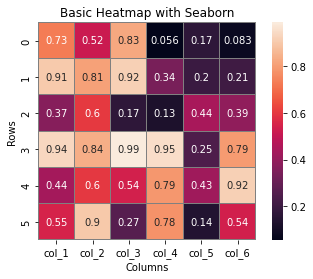

In [29]:
# basic heatmap with SEABORN

fig, ax = plt.subplots()
ax = sns.heatmap(data = heatmap_df,
                 annot=True,           # annotate with correlation values
                 linewidths=.1,        # matrix line widths
                 linecolor ='grey',   # matrix line color
                 square=True)

ax.set_title("Basic Heatmap with Seaborn")
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

<a id='correlation_matrix'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**Correlation matrix**

To create the correlation matrix for the visualizations, we will be using the pandas function
 [.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)  

This function computes pairwise correlation of columns, excluding NA/null values.

<code>correlation_df = df.corr()</code>
   
Optional Parameters:
* <code>method</code> is the type of correlation to run. Options are:
    * 'pearson': default,  standard correlation coefficient
    * 'kendall': Kendall Tau correlation coefficient
    * 'spearman': Spearman rank correlation
    

In [30]:
#Lets make a very basic correlation matrix/dataframe
correlation_df = cars.corr()
correlation_df

,Year,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
Year,1.000000,0.586234,-0.360762,-0.381714,-0.419929,-0.315389,0.301992
MPG,0.586234,1.000000,-0.735563,-0.764277,-0.726670,-0.787510,0.424490
Cylinders,-0.360762,-0.735563,1.000000,0.951787,0.823467,0.895220,-0.522452
Displacement,-0.381714,-0.764277,0.951787,1.000000,0.873758,0.932475,-0.557984
Horsepower,-0.419929,-0.726670,0.823467,0.873758,1.000000,0.840811,-0.682047
Weight,-0.315389,-0.787510,0.895220,0.932475,0.840811,1.000000,-0.430086
Acceleration,0.301992,0.424490,-0.522452,-0.557984,-0.682047,-0.430086,1.000000


<a id='correlation_heatmap'></a>

<div style="padding: 5px; padding-left: 10px; background:#e6e6e6">

**Correlation heatmaps**

<img src="example_images/data_visualization_tutorial/viz_heatmap_correlation_examples.png" width="750"/> 

When creating correlation plots, incorporating just a few elements will make them much more interpretable: 
* colorbar should span -1 to 1
* Diverging colormap:  with a neutral color in the middle to represent 0, some options are:
 <img src="example_images/data_visualization_tutorial/viz_diverging_colormaps.png" width="200"/> 
*  Correlation size/magnitude encoding in addition allows patterns to standout
    * This technique is not trivial with matplotlib or seaborn so we will not cover it but there is a nice example and explanation [here on kaggle](https://www.kaggle.com/code/drazen/heatmap-with-sized-markers/notebook)
    
**With Matplotib:**
A Correlation plot can be acheived the same way as the code example above with some slight modifications to the colormap and colorbar range
    
**With Seaborn:**
Similarly to matplotlib we only need to made a few tweaks to the [.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) code we used above to make a plot like the "Good" example above. 

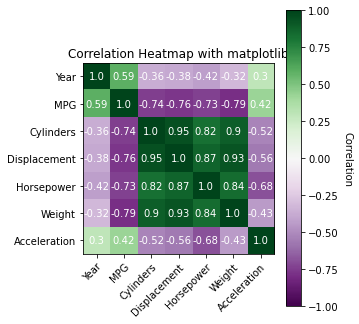

In [62]:
# Correlation heatmap with MATPLOTLIB:

# CREATE FIGURE

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(correlation_df,
               cmap='PRGn',         # diverging colormap
               vmin = -1, vmax = 1) # set colorbar range

# LABELING ROWS & COLUMNS
ax.set_title("Correlation Heatmap with matplotlib")

column_labels = correlation_df.columns
row_labels = correlation_df.index

ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(row_labels)))

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# rotate labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
        
# ADD COLORBAR/SCALEBAR
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")


## ADD ANNOTATED VALUES TO PLOT
for row in range(len(row_labels)):
    for column in range(len(column_labels)):
        rounded_values = round(correlation_df.loc[row_labels[row], 
                                                       column_labels[column]], 
                                    2)
        text = ax.text(column, row, rounded_values,
                       ha="center", va="center", color="w")


fig.tight_layout()

<a id='heatmap_seaborn'></a>

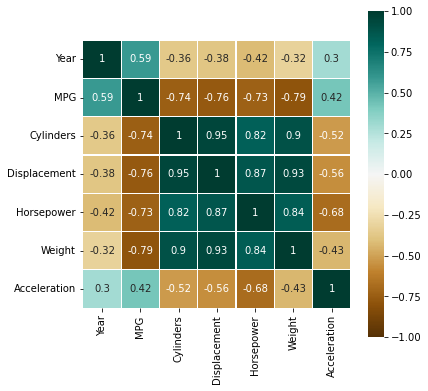

In [32]:
# Correlation heatmap with Seaborn:
plt.figure(figsize=(6,6))

sns.heatmap(data = correlation_df,
            cmap = 'BrBG',        # brown-teal diverging color map
            vmin = -1, vmax = 1,  # set the colorbar range (-1 - 1 for correlation)
            center=0,             # set the center of the color bar
            annot=True,           # annotate with correlation values
            linewidths=.1,        # matrix line widths
            linecolor ='white',   # matrix line color
            square=True)

<a id='pcr'></a>

<div style="padding: 5px; padding-left: 10px; background: #e6f2ff">
<h2> PCA Visualization</h2>

The principal components of a collection of points in a real coordinate space are a sequence of {\displaystyle p}p unit vectors, where the {\displaystyle i}i-th vector is the direction of a line that best fits the data while being orthogonal to the first {\displaystyle i-1}i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.   
    
<img src="example_images/data_visualization_tutorial/viz_pca_generic.png" width="300"/>
    
PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The {\displaystyle i}i-th principal component can be taken as a direction orthogonal to the first {\displaystyle i-1}i-1 principal components that maximizes the variance of the projected data.
 
<img src="example_images/data_visualization_tutorial/viz_pca_examples.png" width="800"/>
 
Jumplinks:
* <a href='#pca_setup'>setup for PCA</a>   
* <a href='#pca_sklearn'>PCA with sklearn package and matplotlib</a>
* <a href='#pca_pca'>PCA with the pca package</a> 

In [ ]:
# SETUP

# Remove categorical columns
makes = cars['Make']
models = cars['Model']
origins = cars['Origin']
cars_pca = cars.drop(['Make','Model', 'Origin', 'Year'], axis=1)

## perform PCA
n = len(cars_pca.columns)
scaled_data = StandardScaler().fit_transform(cars_pca)

In [ ]:
# PCA with sklearn
pca = SK_PCA(n_components=n)

# defaults number of Principle components to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(scaled_data)


## project data into Principal Component space
# 0,1 denote PC1 and PC2; change values for other PCs

xvector = pca.components_[0]  # see 'prcomp(data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(scaled_data)[:, 0]  # see 'prcomp(data)$x' in R
ys = pca.transform(scaled_data)[:, 1]

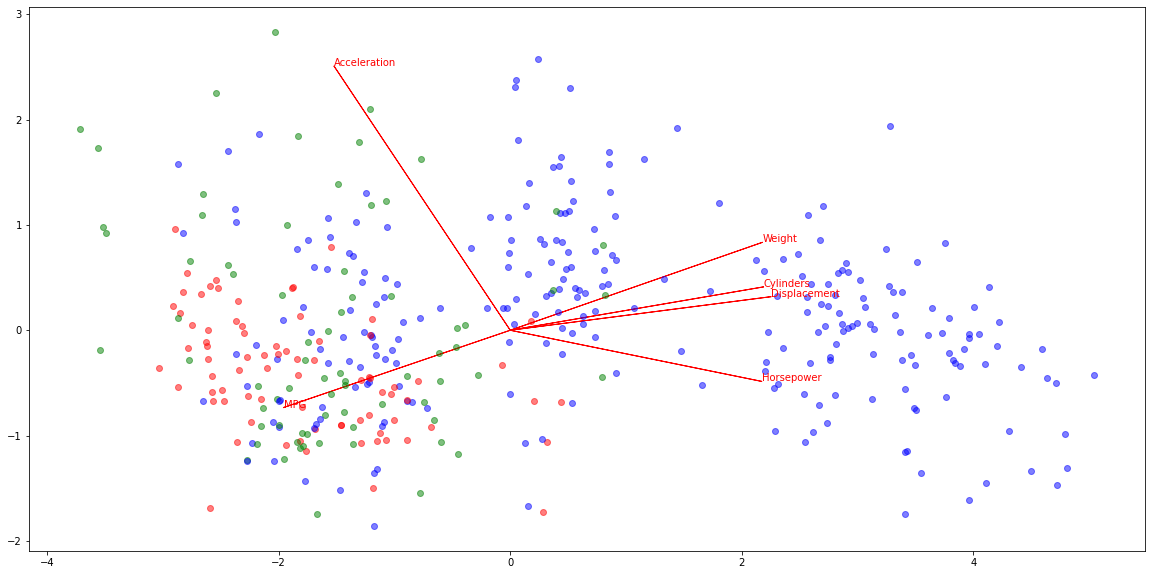

In [53]:
## visualize projections

## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

colors = {'US':'b', 'Europe':'g', 'Japan':'r'}

plt.figure(figsize=(20, 10))
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto principle component axes
    plt.arrow(0, 0, 
              xvector[i] * max(xs), 
              yvector[i] * max(ys),
              color='r', 
              width=0.0005, 
              head_width=0.0025)
    plt.text(xvector[i] * max(xs) * 1, 
             yvector[i] * max(ys) * 1,
             list(cars_pca.columns.values)[i], 
             color='r')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto principle component axes
    plt.plot(xs[i], 
             ys[i], 
             'bo', 
             color=colors[origins[i]], alpha = 0.5)
    #plt.text(xs[i] * 1.2, ys[i] * 1.2, list(names)[i], color='b')
    
plt.show()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


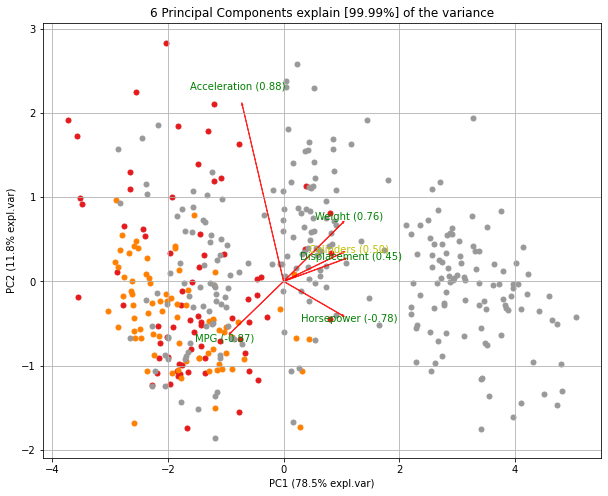

In [60]:
# PCA with pca package


# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = PCA(n_components=n)

# Or reduce the data towards 2 PCs
#model = pca(n_components=n)
pca_cars = pd.DataFrame(scaled_data, columns=cars_pca.columns)

# Fit transform
results = model.fit_transform(pca_cars)

# Scatter first 2 PCs
#fig, ax = model.scatter()



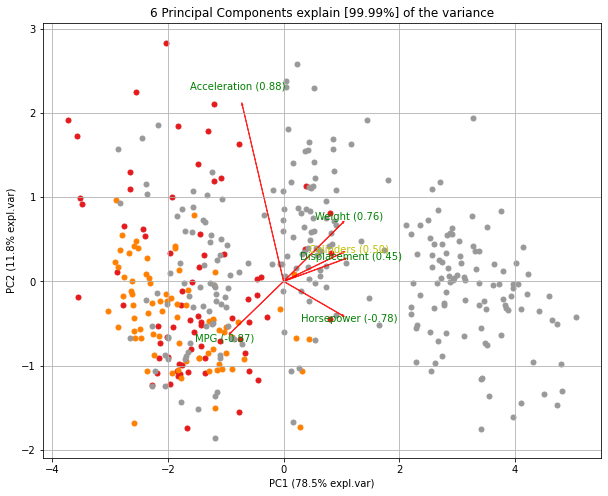

In [38]:
# Make biplot with the number of features
fig, ax = model.biplot(n_feat=n,
                       y = origins,
                       label=False, 
                       legend=False)

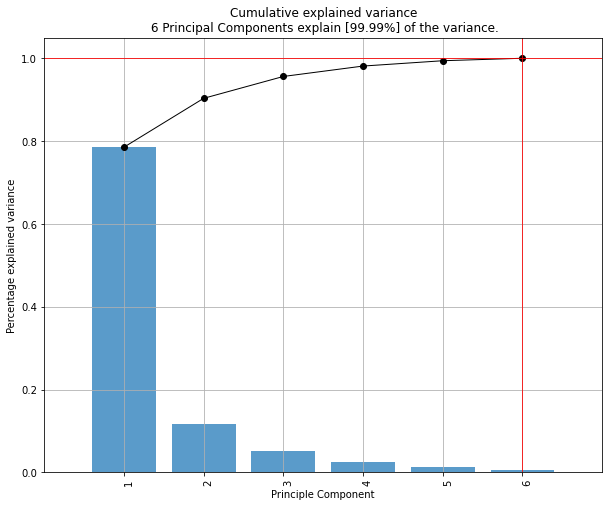

<Figure size 432x288 with 0 Axes>

In [61]:
# Plot explained variance
fig, ax = model.plot()